     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

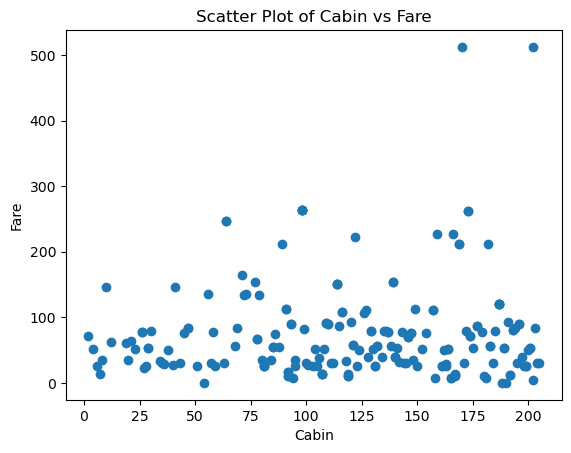

(624, 12)
(267, 12)


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the  dataset
df = pd.read_csv("titanic.csv")
print(df)

# Handle missing values in the 'Age' column
for i in df.index:
    if pd.isnull(df.loc[i, 'Age']):
        df.loc[i, 'Age'] = df['Age'].median()
        print(df.loc[i, :])

# Map unique Cabin names to numerical values
unique_cabins = []
for i in df.index:
    cabin = df.loc[i, 'Cabin']
    if cabin not in unique_cabins:
        unique_cabins.append(cabin)
        df.loc[df['Cabin'] == cabin, 'Cabin'] = len(unique_cabins)

# Shuffle the dataset
shuffled_indices = np.random.permutation(len(df))
df = df.iloc[shuffled_indices].reset_index(drop=True)

# Split into training and testing datasets
split_ratio = 0.7
split_index = int(np.round(len(df) * split_ratio))
training_data = df.iloc[:split_index]
testing_data = df.iloc[split_index:]

# Plot a scatter graph of Cabin vs Fare
plt.scatter(df['Cabin'], df['Fare'])
plt.xlabel('Cabin')
plt.ylabel('Fare')
plt.title('Scatter Plot of Cabin vs Fare')
plt.show()

print(training_data.shape)
print(testing_data.shape)


In [3]:
df_Norm = df.copy()
print(df_Norm)
#Z-Score Normalization
encore = pd.get_dummies(data = df_Norm,columns = ['Sex','Cabin','Embarked','Ticket'])
print(encore)

     PassengerId  Survived  Pclass  \
0            343         0       2   
1            194         1       2   
2            188         1       1   
3            141         0       3   
4            880         1       1   
..           ...       ...     ...   
886          148         0       3   
887          413         1       1   
888          837         0       3   
889          107         1       3   
890           89         1       1   

                                              Name     Sex   Age  SibSp  \
0                       Collander, Mr. Erik Gustaf    male  28.0      0   
1                       Navratil, Master. Michel M    male   3.0      1   
2    Romaine, Mr. Charles Hallace ("Mr C Rolmane")    male  45.0      0   
3                    Boulos, Mrs. Joseph (Sultana)  female  28.0      0   
4    Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)  female  56.0      0   
..                                             ...     ...   ...    ...   
886               

In [6]:
# Define SVM class
class SVM:
    def __init__(self, kernel=None, C=1.0, tolerance=0.001, max_iter=1000):
        self.kernel = kernel
        self.C = C
        self.tolerance = tolerance
        self.max_iter = max_iter

    def kernel_matrix(self, x1, x2):
        if self.kernel == 'linear':
            return np.dot(x1, x2)
        elif self.kernel == 'poly':
            return (np.dot(x1, x2) + 1)**2
        elif self.kernel == 'rbf':
            return np.exp(-np.linalg.norm(x1 - x2)**2 / 2)